# Análise de Sentimentos
Vamos fazer uma análise de sentimentos de cada livro, buscando a quantidade de frases com polaridade positiva, negativa ou neutras.

Com isso, pretendemos identificar o principal sentimento de cada livro.


### Polyglot
Vamos usar uma biblioteca simples que pode ser usadas para detectar a polaridade de textos (negativo ou positivo).

Vamos usar a [Polyglot](https://polyglot.readthedocs.io/en/latest/index.html) que tem suporte a lingua portuguesa.

#### Instalar Polyglot
Primeiro, temos que instalar algumas dependências (acrescente a "!" se estiver no Colab):

```!pip install -U git+https://github.com/aboSamoor/polyglot.git@master```

In [1]:
pip install -U git+https://github.com/aboSamoor/polyglot.git@master

  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-t7il7mjo
  Running command git clone -q https://github.com/aboSamoor/polyglot.git /tmp/pip-req-build-t7il7mjo
     |████████████████████████████████| 41.4MB 103kB/s 
     |████████████████████████████████| 235kB 51.9MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=70643 sha256=05307c582f9f18925bfd2cc161770832ee7c6e45f6a1cee329500e91f600afa0
  Stored in directory: /tmp/pip-ephem-wheel-cache-n6geb_uu/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
  Created wheel for pycld2: filename=pycld2-0.41-cp36-cp36m-linux_x86_64.whl size=9833539 sha256=0593a17ca55e46d8efbf3200c1e810c82c76216366dffac3ee075e12ca705742
  Stored in directory: /root/.cache/pip/wheels/c6/8f/e9/08a1a8932a490175bd140206cd86a3dbcfc70498100de11079
  Created wheel for PyICU: filename=PyICU-2.6-cp36-cp36m-linux_x86_64.whl size=1288204 sha256=412c9e7ca42d2a32a24ff8e7be3f7ac9cf7

In [9]:
import polyglot
from polyglot.text import Text
# Baixa o léxicos da lingua portuguesa
!polyglot download LANG:pt

[polyglot_data] Downloading collection 'LANG:pt'
[polyglot_data]    | 
[polyglot_data]    | Downloading package sgns2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    |   Package sgns2.pt is already up-to-date!
[polyglot_data]    | Downloading package unipos.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    | Downloading package ner2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    |   Package ner2.pt is already up-to-date!
[polyglot_data]    | Downloading package counts2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    |   Package counts2.pt is already up-to-date!
[polyglot_data]    | Downloading package transliteration2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_data]    |   Package transliteration2.pt is already up-to-
[polyglot_data]    |       date!
[polyglot_data]    | Downloading package embeddings2.pt to
[polyglot_data]    |     /root/polyglot_data...
[polyglot_da

### Análise de sentimentos
Agora que já instalamos a biblioteca, vamos fazer um primeiro teste com a ```polyglot```. Neste teste, ela está retornando a polaridade de cada palavra da nossa frase.

In [11]:
text = Text("O filme que vimos é realmente muito bom!")
print("{:<16}{}".format("Word", "Polarity")+"\n"+"-"*30)
for w in text.words:
    print("{:<16}{:>2}".format(w, w.polarity))

Word            Polarity
------------------------------
O                0
filme            0
que              0
vimos            0
é                0
realmente        0
muito            1
bom              1
!                0


### Abrir o corpus de cada livro
Vou mostrar aqui como geramos a análise de sentimentos para um livro, depois é só replicar o código para os demais.

In [5]:
import pandas as pd


In [95]:
file = open("livro7.txt", "r", encoding='UTF-8')
df = pd.DataFrame(file)
df.columns = ['lines']
df = df.sort_index()
file.close()
df

,lines
0,oh o tormento gerar corrido o gritar agudo mor...
1,existir curar casar e nao dela nao nao deles l...
2,cantar voce deus treva o terra\n
3,oucam abencoados poder subterraneos atender o ...
4,abencoe criancas lhe o triunfar\n
...,...
10770,o trem dobrar esquinar\n
10771,o mao harry levantar despedir\n
10772,ficar murmurar ginny\n
10773,harry olhar abaixar o mao distraidamente e toc...


In [56]:
df

,lines
0,nao discussao irromper durante o cafe manha nu...
1,vernon dursley acordar primeiro horar manha ba...
2,semana rugir o mesa\n
3,voce nao conseguir controlar corujar harry ten...
4,entediar dizer\n
...,...
5367,chamar dursleys ok nao aguentar duda conversar\n
5368,tio e tio ficarao orgulhoso nao e dizer hermio...
5369,ouvir o voce ano orgulhoso dizer harry\n
5370,voce e louco poder morrer e nao conseguir vao ...


#### Vamos contar quantas frases positivas, negativas e neutras tem o livro
Além das frases positivas e negativas, também existem as frases neutras, por iss ovamos contabilizá-las.

Como tiramos os acentos, *stopwords* e aplicamos a lematização, algumas vezes o *polyglot* não consegue entender a frase e gera uma exceção. Por isso tivemos que tratar essa situação.

In [96]:
qtdeFrasesPos = 0
qtdeFrasesNeg = 0
qtdeFrasesNeu = 0
qtdeFrasesErr = 0

# Percorre as frases
for frase in df['lines']: 

  text = Text(frase)
  try:
    result = text.polarity
    print("Polaridade: " + str(result) + " >>> " + frase + "\n")
  except:
    print("ERRO: ")
    print(text)
    qtdeFrasesErr += 1
    #raise
  
  # Faz contagem das polaridades
  if result > 0:
    qtdeFrasesPos += 1
  elif result < 0:
    qtdeFrasesNeg += 1
  else:
    qtdeFrasesNeu += 1
                               
  # Imprime 
  print("Polaridade: " + str(result) + " >>> " + frase + "\n")


A saída de streaming foi truncada nas últimas 5000 linhas.

Polaridade: -0.3333333333333333 >>> lupin jovem tambem e surrar e cabelar grosso e escuro


Polaridade: 0.0 >>> parecer feliz voltar o familiar palco tanto andancas adolescente


Polaridade: 0.0 >>> parecer feliz voltar o familiar palco tanto andancas adolescente


Polaridade: 1.0 >>> o sorriso lily o amplo


Polaridade: 1.0 >>> o sorriso lily o amplo


Polaridade: 0.6 >>> empurrar o cabelar tras aproximar dele e ver olho tao parecido dele procurar rostir avidez ser capaz olhar o suficiente


Polaridade: 0.6 >>> empurrar o cabelar tras aproximar dele e ver olho tao parecido dele procurar rostir avidez ser capaz olhar o suficiente


ERRO: 
voce tao corajoso

Polaridade: 0.6 >>> voce tao corajoso


Polaridade: 0.0 >>> nao conseguir falar


Polaridade: 0.0 >>> nao conseguir falar


Polaridade: 1.0 >>> olho deleitar e pensar gostar ficar pe e olhar e o suficiente


Polaridade: 1.0 >>> olho deleitar e pensar gostar ficar pe e olhar

In [97]:
print("qtdeFrasesPos: "+str(qtdeFrasesPos))
print("qtdeFrasesNeg: "+str(qtdeFrasesNeg))
print("qtdeFrasesNeu: "+str(qtdeFrasesNeu))
print("qtdeFrasesErr: "+str(qtdeFrasesErr))

qtdeFrasesPos: 2274
qtdeFrasesNeg: 4803
qtdeFrasesNeu: 3698
qtdeFrasesErr: 2200


In [98]:
# Agora calculamos as porcentagens
print("POSITIVOS: {}%".format(100*qtdeFrasesPos/(qtdeFrasesPos+qtdeFrasesNeg+qtdeFrasesNeu))) 
print("NEGATIVOS: {}%".format(100*qtdeFrasesNeg/(qtdeFrasesPos+qtdeFrasesNeg+qtdeFrasesNeu))) 
print("NEUTROS: {}%".format(100*qtdeFrasesNeu/(qtdeFrasesPos+qtdeFrasesNeg+qtdeFrasesNeu))) 

POSITIVOS: 21.104408352668212%
NEGATIVOS: 44.5754060324826%
NEUTROS: 34.32018561484919%


In [99]:
sentimentoPositivoLivro7=100*qtdeFrasesPos/(qtdeFrasesPos+qtdeFrasesNeg+qtdeFrasesNeu)
sentimentoNegativoLivro7=100*qtdeFrasesNeg/(qtdeFrasesPos+qtdeFrasesNeg+qtdeFrasesNeu)
sentimentoNeutroLivro7=100*qtdeFrasesNeu/(qtdeFrasesPos+qtdeFrasesNeg+qtdeFrasesNeu)

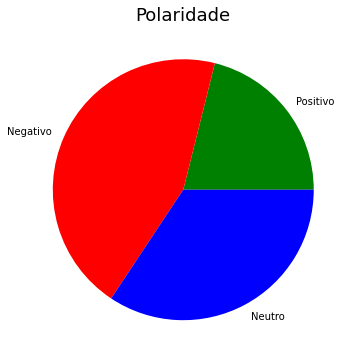

In [100]:
fig=plt.figure(figsize=(6,6))
plt.pie([sentimentoPositivoLivro7, sentimentoNegativoLivro7, sentimentoNeutroLivro7],labels=['Positivo', 'Negativo', 'Neutro'],colors=['green', 'red', 'blue'])
plt.ylabel('')
plt.title('Polaridade',fontsize='18')
plt.show()

## Análise de sentimentos

Agora vamos colocar todas as quantidades que encontramos em um gráfico de barras, para comparar os sentimentos ao longo dos livros.

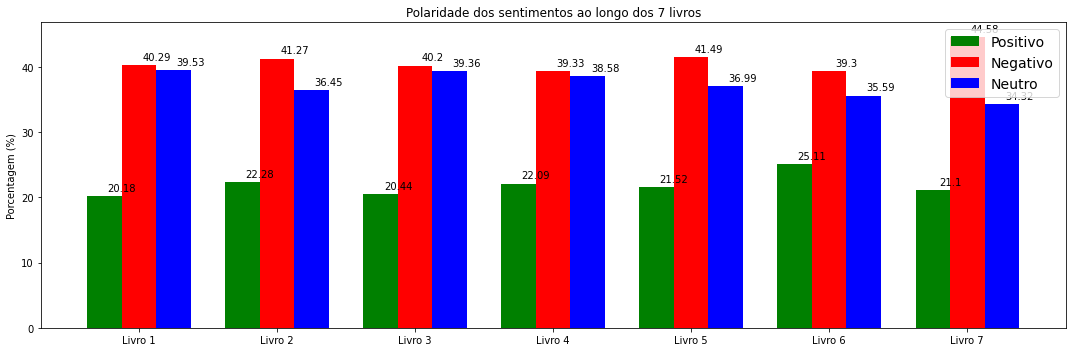

In [113]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['Livro 1', 'Livro 2', 'Livro 3', 'Livro 4', 'Livro 5', 'Livro 6', 'Livro 7']
positivo = [sentimentoPositivoLivro1, sentimentoPositivoLivro2, sentimentoPositivoLivro3, sentimentoPositivoLivro4, sentimentoPositivoLivro5, sentimentoPositivoLivro6, sentimentoPositivoLivro7]
negativo = [sentimentoNegativoLivro1, sentimentoNegativoLivro2, sentimentoNegativoLivro3, sentimentoNegativoLivro4, sentimentoNegativoLivro5, sentimentoNegativoLivro6, sentimentoNegativoLivro7]
neutro = [sentimentoNeutroLivro1, sentimentoNeutroLivro2, sentimentoNeutroLivro3, sentimentoNeutroLivro4, sentimentoNeutroLivro5, sentimentoNeutroLivro6, sentimentoNeutroLivro7]

x = np.arange(len(labels))  # localizacao ds rotulos
width = 0.25  # comprimento das barra s

fig, ax = plt.subplots(figsize=(15,5))

# arredondando os valores para duas casas decimais
positivo1 = [round(valor,2) for valor in positivo]
negativo1 = [round(valor,2) for valor in negativo]
neutro1 = [round(valor,2) for valor in neutro]

rects1 = ax.bar(x-width, positivo1, width, label='Positivo', color='g')
rects2 = ax.bar(x, negativo1, width, label='Negativo', color='r')
rects3 = ax.bar(x+width, neutro1, width, label='Neutro', color='b')

# Adicionando textos dos rotulos

ax.set_ylabel('Porcentagem (%)')
ax.set_title('Polaridade dos sentimentos ao longo dos 7 livros')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 14)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width(), height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


Como podemos ver, todos os livros apresentam uma porcentagem menor de frases positivas em reação às negativas e neutras (no nosso cálculo de similaridade, não estamos levando em conta as frases que deram erro ao tentar extrair a polaridade).

Isso nos mostra que todos os livros seguem um certo padrão, os dados sugerem que não existe um livro mais "alegre" e outro mais "sombrio".